## Logistic Regression: Telecom National Case-Study

Predict the likelihood of a new customer 'churning' or leaving a specific service provider.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

## 1.0 Checking for Binary Logistic Regression on the data

In [18]:
# Read csv file
df = pd.read_csv('customer_data.csv')

# Print the output
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Edu            41188 non-null  object 
 2   Comm           41188 non-null  object 
 3   Duration       41188 non-null  int64  
 4   Campaign       41188 non-null  int64  
 5   PosDays        41188 non-null  int64  
 6   Last_out       41188 non-null  object 
 7   Var_rate       41188 non-null  float64
 8   Price_idx      41188 non-null  float64
 9   Conf_idx       41188 non-null  float64
 10  Month_rate     41188 non-null  float64
 11  Quarterly_emp  41188 non-null  float64
 12  Target         41188 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 4.1+ MB
None


,Age,Edu,Comm,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,basic.4y,cellular,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,unknown,cellular,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,university.degree,cellular,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,high.school,cellular,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,basic.4y,cellular,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


**Assumptions met so far:**

- **Assumption 1:** A binary dependant variable (Target)
- **Assumption 2:** Factor level 1 of dependant variable (y) represents the desired outcome
- **Assumption 6:** Data set is large enough to address business questions

## 1.1 Checking for meaningful variables : Assumption 3

In [19]:
# Prepare the data
# Check for non-numeric columns (Edu, Comm and Last_out)

# Determine unique values
df['Edu'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

In [20]:
# Update 'Edu' column by removing full stops
# Create list with initial values
intial_vals = ['illiterate', 'unknown', 'basic',
               'high', 'university', 'professional']

# Create list with new values
new_vals = ['other', 'other', 'pre-school',
            'high-school', 'uni', 'masters']

# Create a for loop to replace the values
for old_val, new_val in zip(intial_vals, new_vals):
    df.loc[df['Edu'].str.contains(old_val),'Edu' ] = new_val

# Display unique values to check changes
df['Edu'].unique() 

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [21]:
# Determine values of 'Edu' column
df['Edu'].value_counts()

pre-school     12513
uni            12168
high-school     9515
masters         5243
other           1749
Name: Edu, dtype: int64

In [22]:
# Convert strings to numerical to ease data analysis using Label Encoder
# Import necessary libraries, packages and modules
from sklearn.preprocessing import LabelEncoder

# Create a class and write a user-defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        # Ensure y is a pandas Series or convert it to one
        if not isinstance(y, pd.Series):
            y = pd.Series(y)
        
        # Fit the label encoder
        super().fit(y)
        
        # Return self
        return self
    
# Order lists of the values for the Edu column.
Edu_order = ['other', 'pre-school', 'high-school', 'uni', 'masters']

# Create an instance of MyLabelEncoder.
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(Edu_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
df['Edu'] = df['Edu'].apply(lambda x: x if x in Edu_order else 'other')
df['Edu'] = le.transform(df['Edu'])

# View the DataFrame to check
df.head()

,Age,Edu,Comm,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,3,cellular,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,2,cellular,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,cellular,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,0,cellular,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,3,cellular,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [23]:
# Convert strings to dummy variables for 'Comm' and 'Last_out'

# Create dummy variables for 'Comm' column
comm_dummies = pd.get_dummies(df['Comm'], prefix='Comm', drop_first = True)
df = pd.concat([df, comm_dummies.astype(int)], axis=1)

# Create dummy variables for 'Last_out' column
last_out_dummies = pd.get_dummies(df['Last_out'], prefix='Last_out', drop_first = True)

# Join the new columns to the DataFrame.
df = pd.concat([df, last_out_dummies.astype(int)], axis=1)

# Drop the original string columns
df.drop(['Comm', 'Last_out'], axis=1, inplace=True)

# View dataframe to check for changes
df.head()

,Age,Edu,Duration,Campaign,PosDays,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target,Comm_telephone,Last_out_nonexistent,Last_out_success
0,44,3,210,1,999,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0
1,53,2,138,1,999,-0.1,93.200,-42.0,4.021,5195.8,0,0,1,0
2,28,4,339,3,6,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,1
3,39,0,185,2,999,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0
4,55,3,137,1,3,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,1


**Assumptions met so far:**

- **Assumption 1:** A binary dependant variable (Target)
- **Assumption 2:** Factor level 1 of dependant variable (y) represents the desired outcome
- **Assumption 3:** Only meaningful variables needed for data analysis
- **Assumption 6:** Data set is large enough to address business questions

## 1.2 Eliminating multicollinearity: Assumption 4

In [26]:
# Apply Variance Inflation Factor (VIF)

# Import required packages
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set independant and dependant variables
X = df.drop('Target', axis = 1)
y = df['Target']

# Create a dataframe for the VIF output
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i)\
                   for i in range(len(X.columns))]

# View the dataframe
vif_data.sort_values('VIF', ascending = True)

,feature,VIF
3,Campaign,1.926491
2,Duration,2.014275
10,Comm_telephone,2.664511
1,Edu,3.198944
12,Last_out_success,10.765769
11,Last_out_nonexistent,11.735401
0,Age,16.110137
5,Var_rate,30.488870
7,Conf_idx,120.605000
8,Month_rate,260.101019


Values on Campaign, Duration, Comm_telephone and Edu are less than 5 therefore there no correlation between these independant variables and other columns need to be eliminated

In [27]:
# Drop columns with high VIF (>10)
X = X.drop(['Last_out_success', 'Last_out_nonexistent', 'Age', 'Var_rate', 
            'PosDays', 'Conf_idx', 'Month_rate', 'Price_idx', 'Quarterly_emp'],
          axis = 1)

# View the dataframe
print(X.shape)
X.head()            

(41188, 4)


,Edu,Duration,Campaign,Comm_telephone
0,3,210,1,0
1,2,138,1,0
2,4,339,3,0
3,0,185,2,0
4,3,137,1,0


In [29]:
# Recalculate VIF
vif_data2 = pd.DataFrame()
vif_data2['feature'] = X.columns

# Calculate VIF for each feature
vif_data2['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the dataframe in descending order
vif_data2.sort_values('VIF',ascending=True)

,feature,VIF
3,Comm_telephone,1.427620
2,Campaign,1.589627
1,Duration,1.591896
0,Edu,1.928111


## 1.3 Balance the data

In [30]:
# Determine whether values in a column are balanced.
df['Target'].value_counts()

0    36548
1     4640
Name: Target, dtype: int64

Text(0.5, 1.0, 'Target Imbalance')

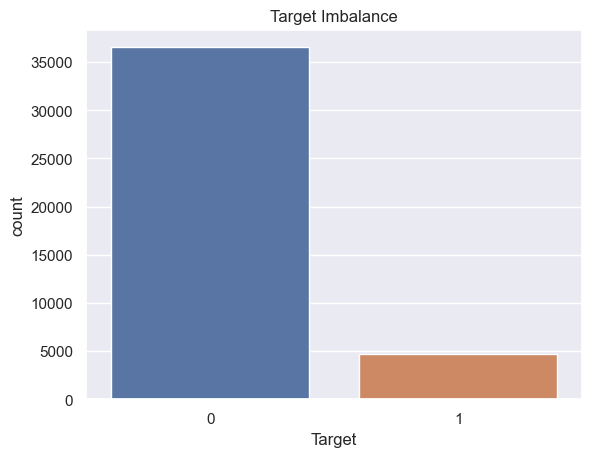

In [31]:
# Create a plot

#Import Seaborn for visulisation
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Target', data=df)
ax.set_title('Target Imbalance')

Data is not balanced

In [33]:
# Balance the dataset using SMOTE (Synthetic Minority Oversampling Technique)

# Import required libraries
# Handles unbalanced data (scikit-learn needed)
!pip install imblearn  

# Optimised linear, algebra, integrations (scientific)
!pip install scipy  

# Simple tools for predictive data analytics
!pip install scikit-learn  

# Oversampling technique; creates new samples from data
!pip install SMOTE 

print("Imported succesfully !")

Imported succesfully !


In [34]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the training data.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   Edu  Duration  Campaign  Comm_telephone
0    3       162         1               0
1    4        62         1               0
2    4       353         1               0
3    3       420         4               1
4    1       212         2               1


,Target
0,0
1,0
2,1
3,0
4,0


In [35]:
# Check if data set is balanced
os_data_y['Target'].value_counts()

0    25617
1    25617
Name: Target, dtype: int64

Text(0.5, 1.0, 'New Balanced Target')

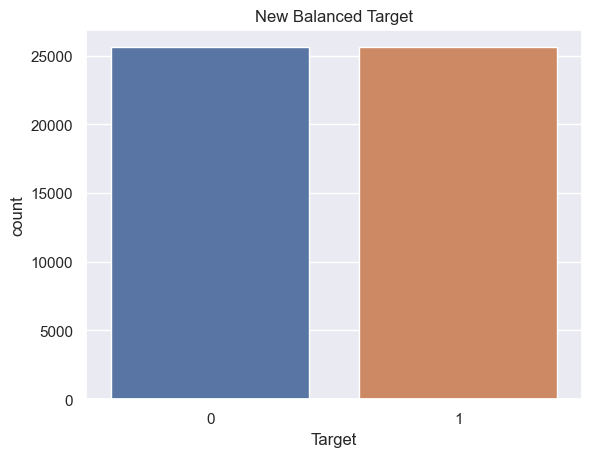

In [36]:
# Visualise data
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Target', data = os_data_y)
ax.set_title("New Balanced Target")

**Assumptions met so far:**

- **Assumption 1:** A binary dependant variable (Target)
- **Assumption 2:** Factor level 1 of dependant variable (y) represents the desired outcome
- **Assumption 3:** Only meaningful variables needed for data analysis
- **Assumption 4:** Limit multicollinearity between independant variables (X)
- **Assumption 6:** Data set is large enough to address business questions

## 1.4 Checking if X's are linearly related to the log odds: Assumption 5

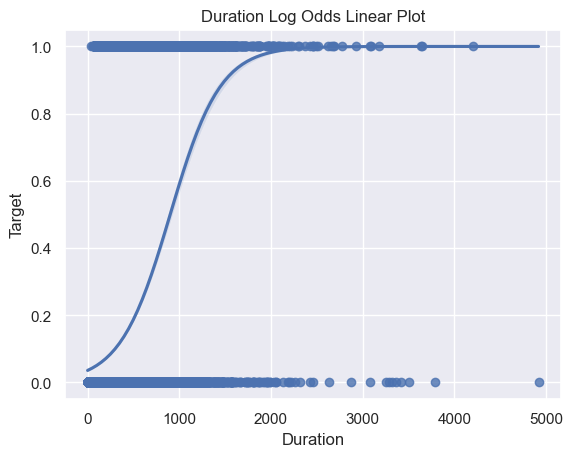

In [39]:
# Visualise data to test linearity of continuous X variables (Duartion)

# Look for S-shaped curve
dur = sns.regplot(x = 'Duration',
                  y= 'Target',
                  data= df,
                  logistic= True).set_title("Duration Log Odds Linear Plot")

**All Assumptions are met!**

- **Assumption 1:** A binary dependant variable (Target)
- **Assumption 2:** Factor level 1 of dependant variable (y) represents the desired outcome
- **Assumption 3:** Only meaningful variables needed for data analysis
- **Assumption 4:** Limit multicollinearity between independant variables (X)
- **Assumption 5:** X's are linearly related to the log odds
- **Assumption 6:** Data set is large enough to address business questions

## 2.0 Determine accuracy of the model

In [42]:
# Fit the model

# Name a new column and specify columns for BLR
nec_cols = os_data_X.columns

# Set independant variables
X = os_data_X[nec_cols]

# Set the dependant variable
y = os_data_y['Target']

# Set the logit() to accept y and X as parameters, and return the logit object
logit_model=sm.Logit(y, X)

# Indicate result = logit_model.fit() function
result = logit_model.fit()  

# Print result
result.summary()

Optimization terminated successfully.
         Current function value: 0.448416
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                51234
Model:                          Logit   Df Residuals:                    51230
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Sep 2023   Pseudo R-squ.:                  0.3531
Time:                        08:02:38   Log-Likelihood:                -22974.
converged:                       True   LL-Null:                       -35513.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Edu               -0.1053      0.006    -17.839      0.000      -0.117      -0.094
Duration           0.0047    5.1e-05     92.606      0.000       0.005       0.005
Campaign          -0.4356      0.008    -52.795      0.000      -0.452      -0.419
Comm_telephone    -2.7434      0.039    -70.600      0.000      -2.820      -2.667
==================================================================================
"""

In [43]:
# Import the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Set LogisticRegression() to logreg
logreg = LogisticRegression(max_iter=1000) 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(os_data_X, os_data_y.values.ravel()) 

LogisticRegression(max_iter=1000)

In [44]:
# Determine BLR model's accuracy.
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(acc))

Accuracy of logistic regression classifier on test set: 0.79


Accuracy of 79% is not a great fit for binary business questions, therefore further test accuracy using confusion matrix to evaluate accuracy of the classification

## 2.1 Confusion Matrix

<Axes: >

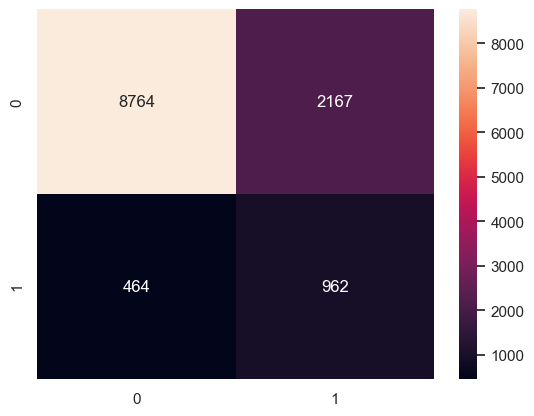

In [45]:
#Create the confusion matrix to test classification accuracy in BLR

# Import the necessary package
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [46]:
# Create a DataFrame to display the confusion matrix 
pd.DataFrame(confusion_matrix, index=['observed_notchurn','observed_churn'],
columns=['predicted_notchurn', 'predicted_churn'])

,predicted_notchurn,predicted_churn
observed_notchurn,8764,2167
observed_churn,464,962


## 3.0 Print the accuracy

In [47]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10931
           1       0.31      0.67      0.42      1426

    accuracy                           0.79     12357
   macro avg       0.63      0.74      0.65     12357
weighted avg       0.88      0.79      0.82     12357



## 4.0 Total number of churned customers

In [49]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test dataset
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Choose a threshold (e.g., 0.5) or determine it based on your business needs
threshold = 0.5

# Identify likely churn customers
likely_churn_customers = X_test[predicted_probabilities > threshold]

# Get the count of likely churn customers
number_of_likely_churns = len(likely_churn_customers)

print(f"Number of likely churn customers: {number_of_likely_churns}")

Number of likely churn customers: 489


In [50]:
total_number_of_customers = X.shape[0]

print(f"Total number of customers: {total_number_of_customers}")

Total number of customers: 51234


In [51]:
percentage_of_likely_churn_customers = (number_of_likely_churns / total_number_of_customers) * 100

print(f"Percentage of Likely Churn Customers: {percentage_of_likely_churn_customers:.2f}%")

Percentage of Likely Churn Customers: 0.95%


## Conclusion:

- Accuracy score of model is 79%
- Percentage of likely to churn customers is 0.95% 